**Objective: To analyze a dataset of home loan applications to identify the key factors influencing approval decisions, uncover patterns and disparities in lending, and provide actionable insights that can help lenders improve decision-making and promote fair, data-driven loan approvals.**

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv('/Users/adronallen/Desktop/Data-Analysis/loan_sanction_test.csv')
df.describe

<bound method NDFrame.describe of       Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0 

In [3]:
#check for missing rows
data_check = df.isnull()
results = data_check.sum()
print(results)

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [5]:
# Filling in missing numerical data with median
numeric_cols = ['LoanAmount', 'Loan_Amount_Term']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].median())

#Filling in missing categorical data with mode
categorical_cols = ['Gender', 'Dependents', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [9]:
# Check for duplicates
print(df.duplicated().sum())
print(df.columns)

0
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


**DATA SUMMARIZATIONS**

In [ ]:
# How many applicants are male vs female?
df['Gender'].value_counts()

Gender
Male      297
Female     70
Name: count, dtype: int64

In [16]:
# Are most applicants married?
df['Married'].value_counts()

Married
Yes    233
No     134
Name: count, dtype: int64

In [24]:
# Average number of dependents?
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)
average_dependents = df['Dependents'].mean().round(2)
print(f"Average number of dependents: {average_dependents}")

Average number of dependents: 0.81


In [25]:
# What percentage are graduates vs non-graduates?
df['Education'].value_counts(normalize=True)*100

Education
Graduate        77.111717
Not Graduate    22.888283
Name: proportion, dtype: float64

In [30]:
# How many are self-employed?
df['Self_Employed'].value_counts()


Self_Employed
No     330
Yes     37
Name: count, dtype: int64

In [31]:
#Which property area (Urban/Rural/Semiurban) has the most applicants?
df['Property_Area'].value_counts()

Property_Area
Urban        140
Semiurban    116
Rural        111
Name: count, dtype: int64

In [32]:
#How many applicants have a positive (1) vs negative (0) credit history?
df['Credit_History'].value_counts()

Credit_History
1.0    308
0.0     59
Name: count, dtype: int64

In [34]:
# What’s the average and most common loan term?
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    317
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: count, dtype: int64

In [ ]:
# What’s the distribution of loan amounts (mean, median, range)? **Thousands
mean_loan = df['LoanAmount'].mean()
median_loan = df['LoanAmount'].median()
loan_range = df['LoanAmount'].max() - df['LoanAmount'].min()

print("Mean Loan Amount:", mean_loan)
print("Median Loan Amount:", median_loan)
print("Range of Loan Amounts:", loan_range)


Mean Loan Amount: 135.9809264305177
Median Loan Amount: 125.0
Range of Loan Amounts: 522.0


In [ ]:
# What’s the income distribution among applicants?
df['ApplicantIncome'].describe()

count      367.000000
mean      4805.599455
std       4910.685399
min          0.000000
25%       2864.000000
50%       3786.000000
75%       5060.000000
max      72529.000000
Name: ApplicantIncome, dtype: float64

In [38]:
#How often do coapplicants contribute significant income?
df['CoapplicantIncome'].describe()

num_with_coapp = (df['CoapplicantIncome'] > 0).sum()
percent_with_coapp = (num_with_coapp / len(df)) * 100

print("Applicants with coapplicant income:", num_with_coapp)
print("Percentage with coapplicant income:", percent_with_coapp)


Applicants with coapplicant income: 211
Percentage with coapplicant income: 57.49318801089919


**Relationship and Correlations**

<function matplotlib.pyplot.show(close=None, block=None)>

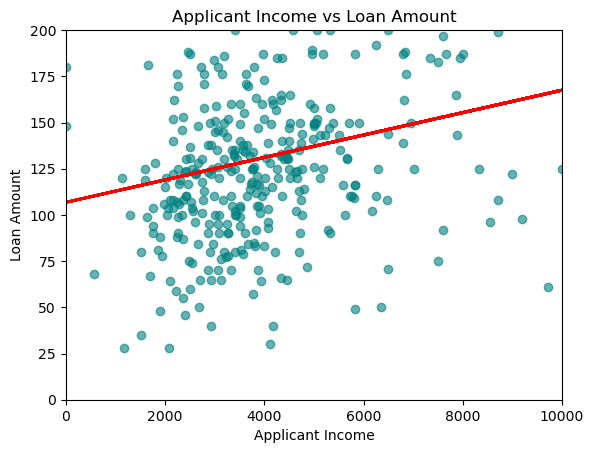

In [42]:
# Are higher-income applicants taking larger loans?
x = df['ApplicantIncome']
y = df['LoanAmount']
plt.scatter(x,y, alpha=0.6, color= 'teal')

m, b = np.polyfit(x, y, 1) 
plt.plot(x, m*x + b, color='red', linewidth=2)
plt.xlim(0, 10000)
plt.ylim(0, 200)

plt.title('Applicant Income vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show

/var/folders/f3/g56pvvfj5sg9n_1h1hx1jfmr0000gn/T/ipykernel_1857/2305126568.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education', y='LoanAmount', data=df, palette='pastel')


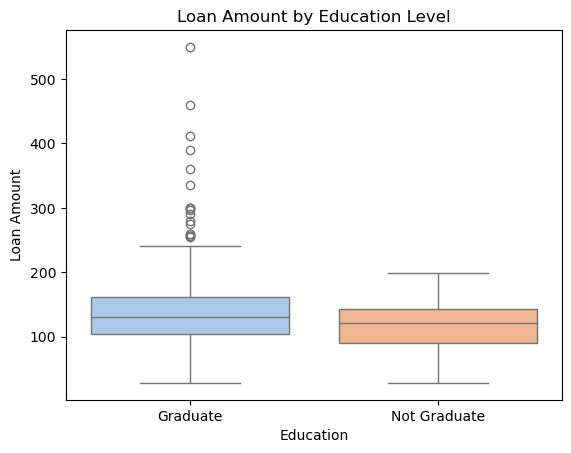

In [41]:
# Do graduates tend to apply for higher loan amounts?
sns.boxplot(x='Education', y='LoanAmount', data=df, palette='pastel')
plt.title('Loan Amount by Education Level')
plt.xlabel('Education')
plt.ylabel('Loan Amount')
plt.show()

Insight : majority of applicants, graduates and non-graduates request roughly the same loan.

/var/folders/f3/g56pvvfj5sg9n_1h1hx1jfmr0000gn/T/ipykernel_1857/2348283502.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_History', y='LoanAmount', data=df, palette= 'pastel')


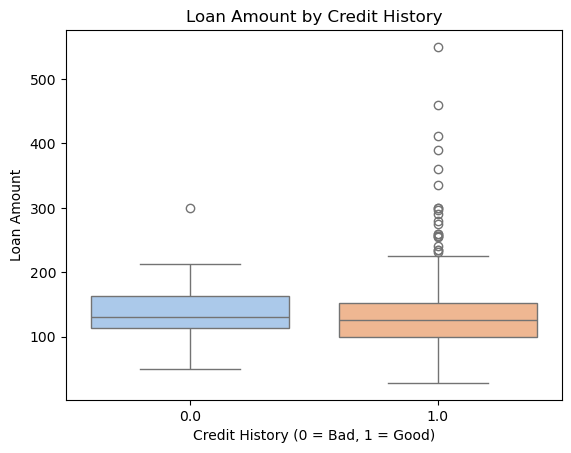

In [43]:
#Does good credit history correlate with larger or smaller loans?
sns.boxplot(x='Credit_History', y='LoanAmount', data=df, palette= 'pastel')
plt.title('Loan Amount by Credit History')
plt.xlabel('Credit History (0 = Bad, 1 = Good)')
plt.ylabel('Loan Amount')
plt.show()

Insight: While the median loan amount is virtually the same for both good (1.0) and bad (0.0) credit applicants ($\approx\$120-\$130$), individuals with a Good Credit History (1.0) are consistently associated with the highest maximum loan values and the most extreme outliers (up to $\approx\$550$).

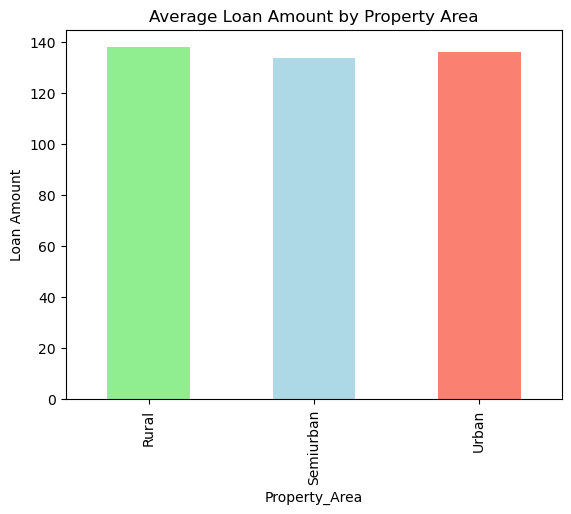

In [44]:
# Does location affect loan size?
df.groupby('Property_Area')['LoanAmount'].mean().plot(kind='bar', color=['lightgreen', 'lightblue', 'salmon'])
plt.title('Average Loan Amount by Property Area')
plt.ylabel('Loan Amount')
plt.show()


**Predicitve Insights**

In [46]:
# combining applicant and coapplicant income
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

#Loan size relative to income
df['LoanAmount_to_Income'] = df['LoanAmount'] / df['TotalIncome']

#categorize applicants by income
bins = [0, 2500, 4000, 6000, 81000]
labels = ['Low', 'Average', 'High', 'Very High']
df['Income_Bin'] = pd.cut(df['TotalIncome'], bins=bins, labels=labels)

# Grouping dependents
df['Dependents_Category'] = pd.cut(df['Dependents'], bins=[-1, 0, 2, 10], labels=['No', '1-2', '3+'])


In [47]:
df.corr(numeric_only=True)['LoanAmount_to_Income']


Dependents             -0.030685
ApplicantIncome        -0.301928
CoapplicantIncome      -0.251995
LoanAmount              0.232064
Loan_Amount_Term        0.153875
Credit_History         -0.175249
TotalIncome            -0.398292
LoanAmount_to_Income    1.000000
Name: LoanAmount_to_Income, dtype: float64

In [48]:
df.groupby(['Education', 'Property_Area'])['LoanAmount_to_Income'].mean()


Education     Property_Area
Graduate      Rural            0.023899
              Semiurban        0.023893
              Urban            0.023219
Not Graduate  Rural            0.023644
              Semiurban        0.031168
              Urban            0.025937
Name: LoanAmount_to_Income, dtype: float64

In [49]:
df.groupby('Credit_History')['LoanAmount_to_Income'].mean()


Credit_History
0.0    0.028210
1.0    0.023681
Name: LoanAmount_to_Income, dtype: float64

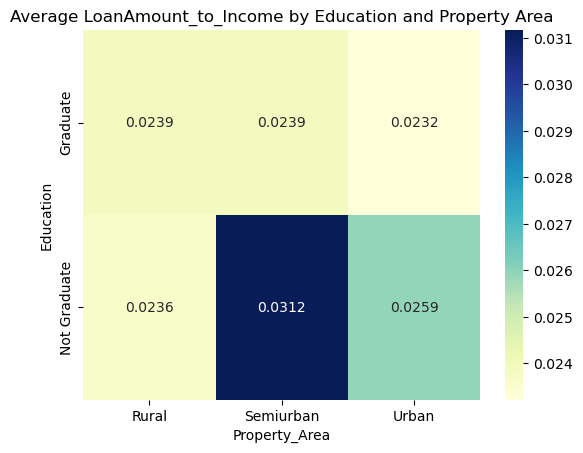

In [52]:
pivot = df.pivot_table(values='LoanAmount_to_Income', index='Education', columns='Property_Area', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt=".4f", cmap='YlGnBu')
plt.title('Average LoanAmount_to_Income by Education and Property Area')
plt.show()

<Axes: xlabel='Credit_History', ylabel='LoanAmount_to_Income'>

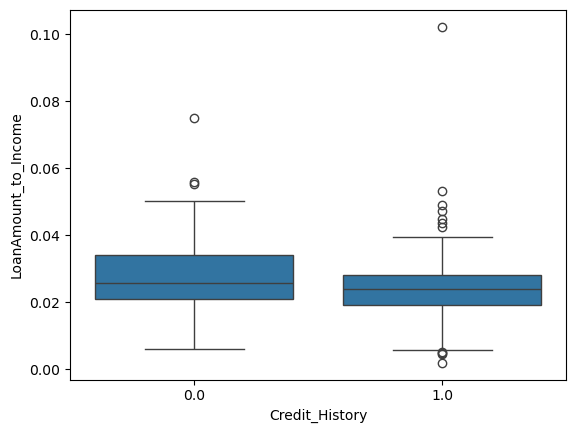

In [50]:
# Boxplot of LoanAmount_to_Income by Credit_History
sns.boxplot(x='Credit_History', y='LoanAmount_to_Income', data=df)

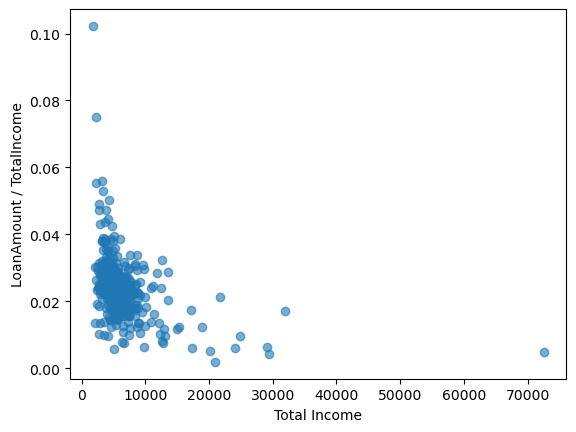

In [ ]:
#Scatter plot: TotalIncome vs LoanAmount
plt.scatter(df['TotalIncome'], df['LoanAmount_to_Income'], alpha=0.6)
plt.xlabel('Total Income')
plt.ylabel('LoanAmount / TotalIncome')
plt.show()


**Applicant Profile and Demographics**

Gender and Marital Status: The applicant pool is overwhelmingly male, with approximately 80.9% of applicants being male. A majority of the applicants (about 63.5%) are also married.

Education and Employment: The applicants are highly educated, with over 77% holding a graduate degree. Furthermore, the pool is predominantly non-self-employed, with approximately 90% of applicants falling into this category.

Dependents and Property Area: The average number of dependents per applicant is low (0.81). Applicants are fairly distributed across property areas, with Urban areas having the highest count, followed by Semiurban and then Rural.


**Financial and Credit Characteristics**

Credit History is Strong: A significant majority of applicants (about 83.9%) have a positive credit history (Credit_History = 1.0), indicating a strong foundational metric for loan approval for most of the pool.

Income Skew: The applicant income distribution is highly skewed, with the mean applicant income ($\approx$ 4,806) being substantially higher than the median ($\approx$ 3,786). This suggests the presence of high-income outliers who significantly inflate the average.

Co-Applicant Contribution: A majority of applications (about 57.5%) include a co-applicant who contributes income, suggesting that combining incomes is a common practice, likely to meet eligibility or debt-to-income requirements.

Loan Amounts: The mean loan amount ($\approx$ 136,000) is slightly higher than the median ($\approx$ 125,000). There is a very wide range in requested loan amounts (a difference of 522,000 between the minimum and maximum).

Most Common Loan Term: The 30-year term (360.0 months) is the overwhelmingly most common loan term, used by 317 out of 367 applicants.

-----------------------------------------------------------------------------------------------------------------------------------------------
Income vs Loan Amount:

Higher-income applicants tend to have lower loan-to-income ratios, meaning they borrow more conservatively relative to their total income.

Loan size alone doesn’t fully capture risk — relative borrowing (LoanAmount_to_Income) is more informative.

Credit History:

Applicants with good credit history (1) borrow slightly less relative to income than those with poor credit (0).

High loan-to-income ratios combined with bad credit indicate higher risk.

Education and Property Area:

Graduates tend to borrow slightly less relative to income than non-graduates, despite possibly taking larger absolute loans.

Location matters: Semiurban non-graduates have the highest loan-to-income ratios, while urban graduates have the lowest.